# 波士顿房价预测：多元线性回归问题

## 数据预处理
### 1. 数据读取

In [1]:
%matplotlib notebook

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

# 读取数据文件
df = pd.read_csv('/Users/andreayu/Documents/data/boston.csv', header=0)

# 显示数据摘要信息
print(df.describe())

# 获取df的值
df = df.values
# 把df转化为np的数组格式
df = np.array(df)

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

### 2. 特征数据归一化
    消除因取值范围不同而导致的特征对标签的影响

In [2]:
# 对0-11列做0-1归一化
for i in range(12):
    df[:, i] = (df[:, i] - df[:, i].min())/(df[:, i].max() - df[:, i].min())

# x_data为前12列特征数据
x_data = df[:, :12]
# y_data为第12列的标签数据
y_data = df[:, 12]

## 模型定义
### 1. 定义占位符
### 2. 定义变量参数
### 3. 定义训练模型
### 4. 定义预测计算节点

In [3]:
# 占位符
x = tf.placeholder(tf.float32, [None, 12], name = 'X')
y = tf.placeholder(tf.float32, [None, 1], name = 'Y')

# 定义了一个命名空间，让TensorBoard视图更整洁
with tf.name_scope('Model'):
    # 初始化一个shape为（12，1）的随机数 - 权重w
    w = tf.Variable(tf.random_normal([12, 1], stddev=0.01), name='W')
    # 初始化偏置b
    b = tf.Variable(1.0, name='b')
    
    # 定义训练模型，权重叉乘
    def model(X, W, b):
        return tf.matmul(X, W) + b
    
    # 预测计算操作，向前计算节点
    pred = model(x, w, b)

## 模型训练
### 1. 设置训练超参数
### 2. 定义损失函数 - 均方差
### 3. 选择优化器
### 4. 声明会话
### 5. 迭代训练

In [4]:
# 设置训练超参数

# 迭代轮数
train_epoch = 50
# 学习率
learning_rate = 0.01

# 定义损失函数
with tf.name_scope('LossFunction'):
    loss_function = tf.reduce_mean(tf.pow(y - pred, 2))

# 选择优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# 声明会话
sess = tf.Session()

# 初始化变量
init = tf.global_variables_initializer()

In [6]:
# 准备TensorBoard数据
logdir = '/Users/andreayu/Documents/data/log'

# 创建一个操作，用于记录损失值loss
summary_loss_op = tf.summary.scalar('loss', loss_function)
# 把所有摘要日志文件合并，方便一次性写入
merged = tf.summary.merge_all()

In [7]:
# 启动会话
sess.run(init)

# 创建摘要的文件写入器（writer）
writer = tf.summary.FileWriter(logdir, sess.graph)

epoch: 1 loss: 60.671143048540735 b: 10.959606 w: [[-0.8346521 ]
 [ 2.9494855 ]
 [ 0.02657509]
 [ 0.7582283 ]
 [ 1.4500926 ]
 [ 9.708734  ]
 [ 2.8762395 ]
 [ 3.049785  ]
 [ 0.6043705 ]
 [ 0.19142474]
 [ 1.2748085 ]
 [-3.8919652 ]]
epoch: 2 loss: 47.33299932328284 b: 16.582844 w: [[-2.1187143 ]
 [ 5.3822384 ]
 [-1.9332678 ]
 [ 3.3929048 ]
 [-0.03179711]
 [16.822567  ]
 [ 2.6313758 ]
 [ 4.2638674 ]
 [-1.8519409 ]
 [-3.08688   ]
 [-1.2995317 ]
 [-8.964423  ]]
epoch: 3 loss: 34.85508075822513 b: 17.67562 w: [[ -2.6144457 ]
 [  4.856072  ]
 [ -1.8566774 ]
 [  4.176968  ]
 [ -0.17538136]
 [ 19.532907  ]
 [  2.5576377 ]
 [  2.35672   ]
 [ -0.53416806]
 [ -3.205842  ]
 [ -3.2927468 ]
 [-12.107834  ]]
epoch: 4 loss: 30.823403029406677 b: 17.64919 w: [[ -2.97443   ]
 [  3.841533  ]
 [ -1.6655381 ]
 [  4.336409  ]
 [ -0.42533746]
 [ 20.75684   ]
 [  2.2993517 ]
 [  0.24839528]
 [  0.35231584]
 [ -3.3351483 ]
 [ -4.7862697 ]
 [-14.179246  ]]
epoch: 5 loss: 28.765570701293765 b: 18.873846 w: [[ -3.

<IPython.core.display.Javascript object>


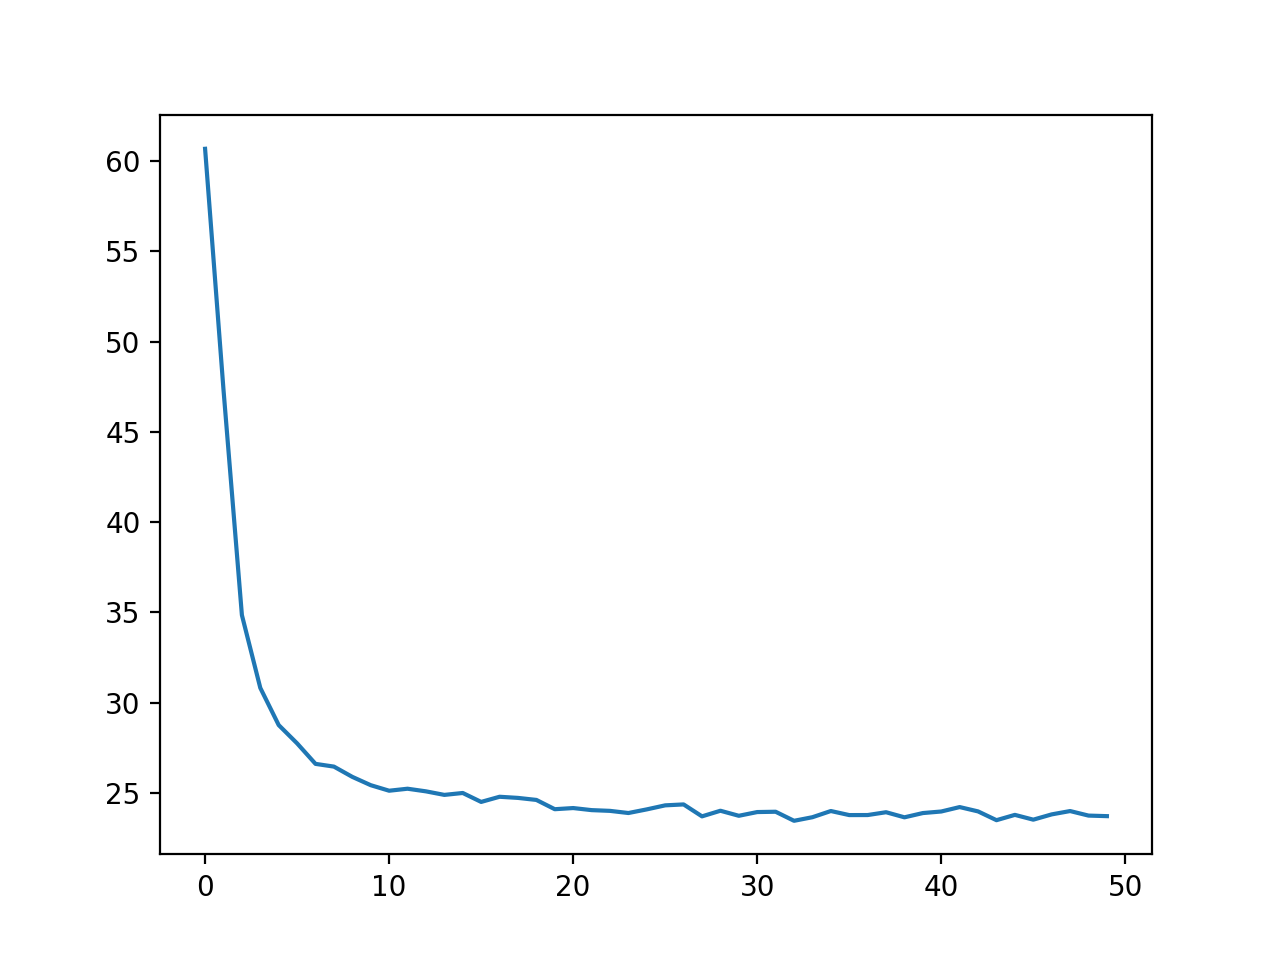

In [8]:
# 可视化训练过程中的损失
loss_list = []

# 模型训练
for epoch in range(train_epoch):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1, 12)
        ys = ys.reshape(1,1)
        
        _, summary_str, loss = sess.run([optimizer, summary_loss_op, loss_function], feed_dict = {x: xs, y: ys})
        
        writer.add_summary(summary_str, epoch)
        loss_sum = loss_sum + loss
        
    # 打乱数据顺序
    x_data, y_data = shuffle(x_data, y_data)
    
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    loss_average = loss_sum/len(y_data)
    
    loss_list.append(loss_average) # 每轮添加一次
    
    print('epoch:', epoch+1, 'loss:', loss_average, 'b:', b0temp, 'w:', w0temp)
    
plt.plot(loss_list)

## 模型应用

In [9]:
# 随机选取
n = np.random.randint(500)
print(n)
x_test = x_data[n]

x_test = x_test.reshape(1,12)
predict = sess.run(pred, feed_dict={x: x_test})
print('预测值：%f' % predict)

target = y_data[n]
print('标签值：%f' % target)

295
预测值：14.463012
标签值：15.400000


In [10]:
sess.close()